# 05. forcast(시계열 분석)

## 1. 배경 및 설치

- fbprophet
    - https://facebook.github.io/prophet/

- install
    - 윈도우 유저는 visual c++ build toll  먼저 설치해야한다.
    - https://go.microsoft.com/fwlink/?LinkId=691126
    - conda install pandas-datareader
    - conda install -c conda-forge fbprophet
    - pip install fbprophet

In [3]:
from fbprophet import Prophet

In [4]:
from pandas_datareader import data

---

## 함수(def)의 기초

In [5]:
def test_def(a,b):
    return a + b

In [6]:
c = test_def(2,3)
c

5

- 가장 기초적인 모양의 def 정의
- 이름(test_def)과 입력 인자 (a , b)를 정해준다.
- 출력(return)을 작성

In [7]:
# 전역변서 (global)
a = 1

def edit_a(i):
    # 지역변수(local)
    global a
    a = i

In [9]:
edit_a(2)
a

2

- global 변수를 def 내에서 사용하고 싶다면  global로 선언
- def 내에서의 변수와 밖에서의 변수는 같은 이름이어도 같은 것이 아니다

$$ y = asin(2\pi ft + t_0) $$

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [15]:
def plotSineWave(amp, freq, endTime, sampleTime, startTime, bias):
    '''
    plot sine wave  
    y = a sin(2 pi f t + t_0) + b
    '''
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2*np.pi*freq*time + startTime) + bias
    
    plt.figure(figsize=(12,6))
    plt.plot(time,result)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('sin')
    plt.title(str(amp) + '*sin(2*pi' + str(freq) + '*t+' + str(startTime) + ')+' + str(bias))
    plt.show()


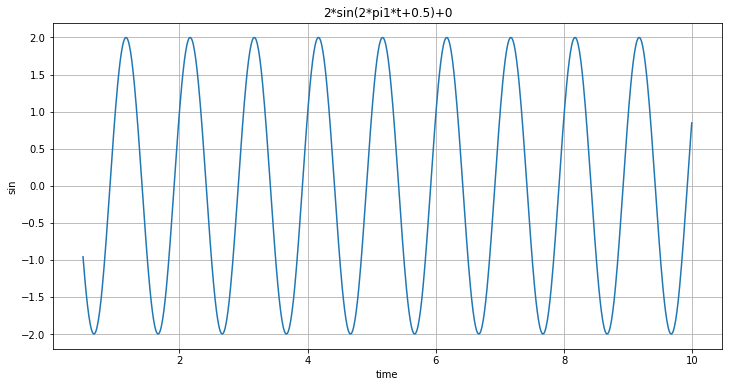

In [16]:
plotSineWave(2, 1, 10, 0.01, 0.5, 0)

In [17]:
def plotSinWave(**kwargs):
    '''
    plot sine wave  
    y = a sin(2 pi f t + t_0) + b
    '''
    
    endTime = kwargs.get('enTime', 1)
    sampleTime = kwargs.get('sampleTime', 0.01)
    amp = kwargs.get('amp', 1)
    freq = kwargs.get('freq', 1)
    startTime = kwargs.get('startTime', 0)
    bias = kwargs.get('bias', 0)
    figsize = kwargs.get('figsize',(12,6))
    
    
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2*np.pi*freq*time + startTime) + bias
    
    plt.figure(figsize=(12,6))
    plt.plot(time,result)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('sin')
    plt.title(str(amp) + '*sin(2*pi' + str(freq) + '*t+' + str(startTime) + ')+' + str(bias))
    plt.show()


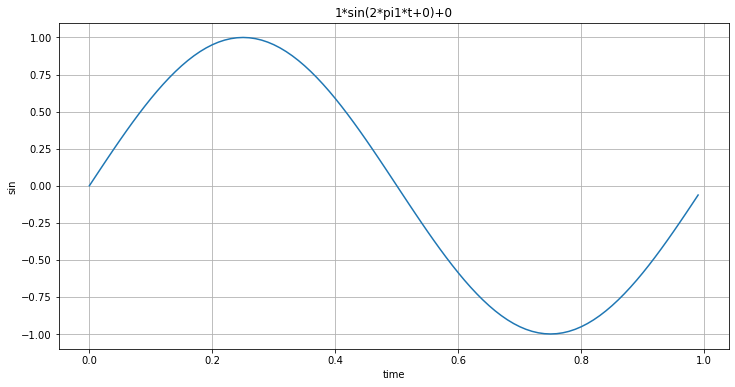

In [18]:
plotSinWave()

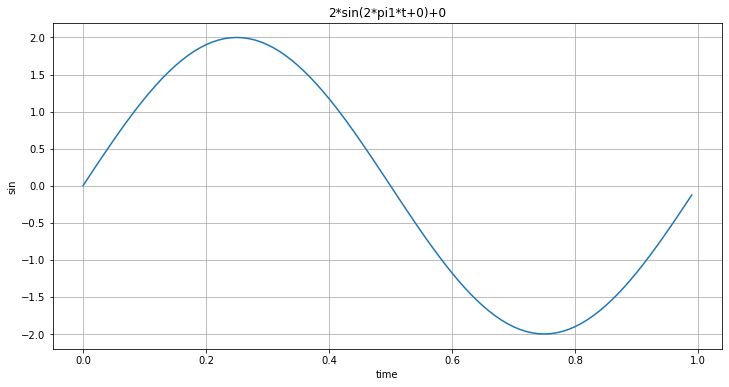

In [19]:
plotSinWave(amp=2, endTime=15)

## 내가 만든 함수 import
- drawSinWave.py

In [6]:
import drawSinWave as dS

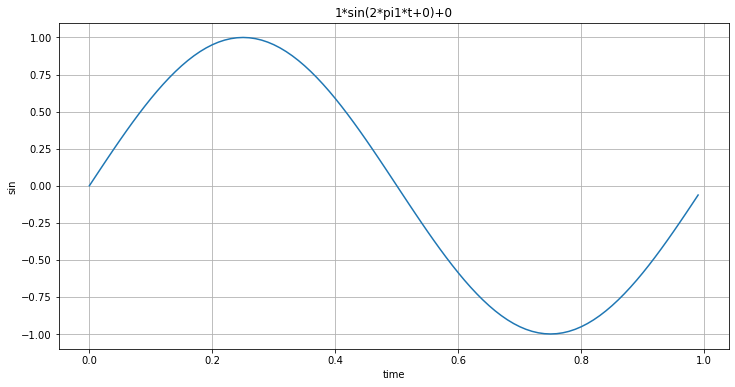

In [7]:
dS.plotSinWave()

## 그래프 한글 설정

In [8]:
import set_matplotlib_hangul

hangul ok in your windows


Text(0.5, 1.0, '한글')

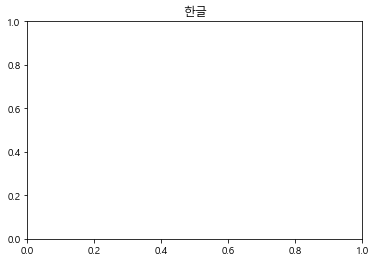

In [11]:
plt.title('한글')

---

### 2. Fbprophet 기초

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range('2018-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds': ds, 'y': result})
df.head()

,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.103243
2,2018-01-03,0.205382
3,2018-01-04,0.305326
4,2018-01-05,0.402007


<AxesSubplot:>

C:\Users\jcc96\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


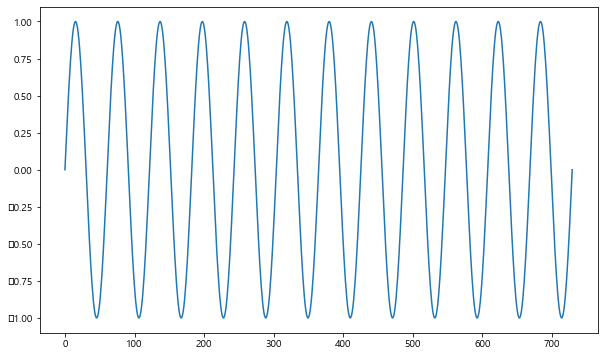

In [14]:
df['y'].plot(figsize=(10,6))

In [16]:
from fbprophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True) # 데이터를 학습시켜서 내용 저장
m.fit(df)

C:\Users\jcc96\anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [17]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

C:\Users\jcc96\anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jcc96\anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


C:\Users\jcc96\anaconda3\envs\ds_study\lib\site-packages\fbprophet\plot.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
C:\Users\jcc96\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


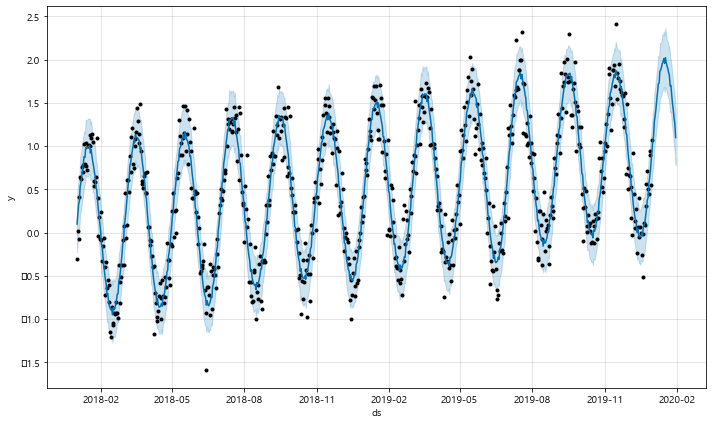

In [31]:
m.plot(forecast);   # ; 이거 안붙이면 2개 나오던데 이유가 뭐지?


<AxesSubplot:>

C:\Users\jcc96\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


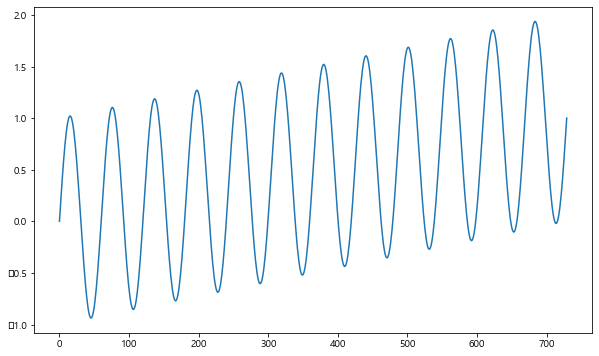

In [20]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time) + time
ds = pd.date_range('2018-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds': ds, 'y': result})

df['y'].plot(figsize=(10,6))

C:\Users\jcc96\anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jcc96\anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jcc96\anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jcc96\anaconda3\envs\ds_study\lib\site-packages\fbprophet\plot.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
C:\Users\jcc96\anaconda3\envs\ds_study\lib\sit

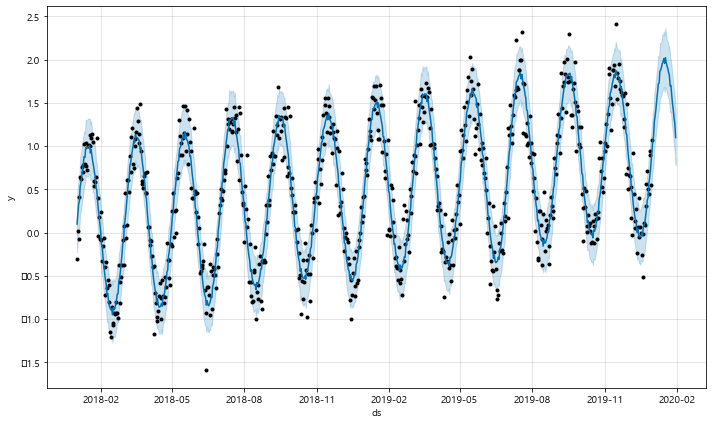

In [26]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

### 3.

<AxesSubplot:>

C:\Users\jcc96\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


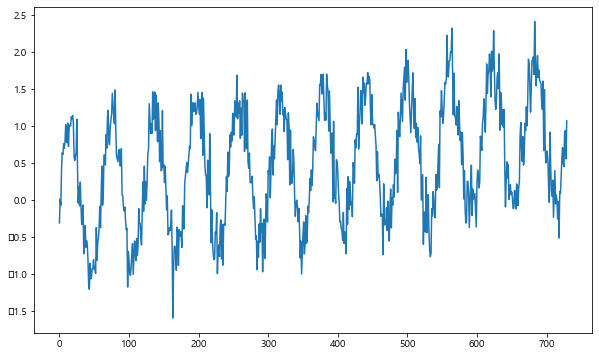

In [23]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4
ds = pd.date_range('2018-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds': ds, 'y': result})

df['y'].plot(figsize=(10,6))

C:\Users\jcc96\anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jcc96\anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jcc96\anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jcc96\anaconda3\envs\ds_study\lib\site-packages\fbprophet\plot.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
C:\Users\jcc96\anaconda3\envs\ds_study\lib\sit

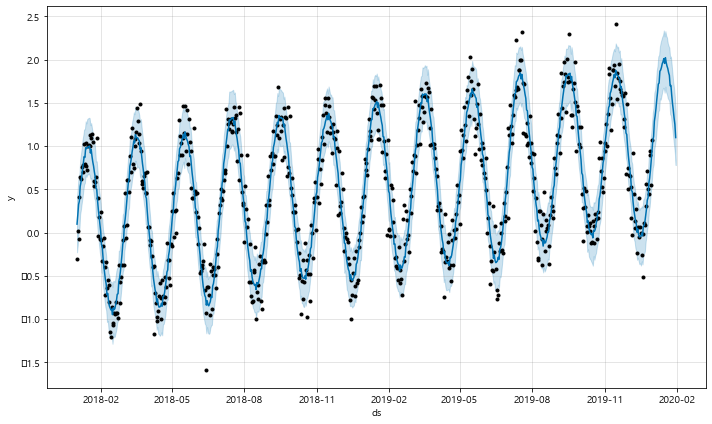

In [24]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

## 3. 시계열 데이터 실전 이용해보기
- https://pinkwink.kr/

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet
from datetime import datetime

%matplotlib inline


In [2]:
pinkwink_web = pd.read_csv(
    '../data/05_PinkWink_Web_Traffic.csv',
    encoding='utf-8',
    thousands=',',  # 1000자리마다 , 있는걸 숫자로 읽어주는것
    names=['date', 'hit'],
    index_col=0        
)

pinkwink_web

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
...,...
17. 6. 27.,1436.0
17. 6. 28.,1387.0
17. 6. 29.,1328.0


In [3]:
pinkwink_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 16. 7. 1. to nan
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hit     365 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


In [5]:
# hit에 null값이 있는걸 확인 할 수 있다. 이걸 지워줘야함
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]   # hit 에서 null이 아닌 값들만 마스킹해서 다시 pinkwink_web에 할당해준다
pinkwink_web


,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
...,...
17. 6. 26.,1309.0
17. 6. 27.,1436.0
17. 6. 28.,1387.0


<AxesSubplot:xlabel='date'>

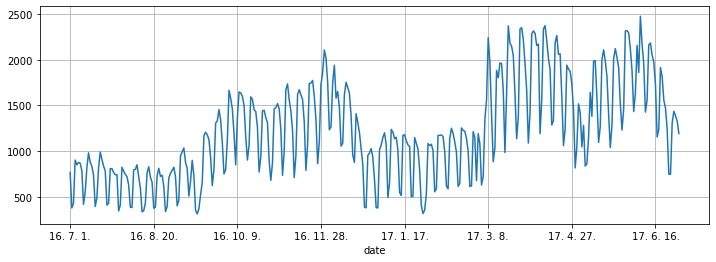

In [6]:
# 전체 데이터 그려보기
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)

In [7]:
# trend 분석을 시각화하기 위한 x축 값을 만들기
time = np.arange(0, len(pinkwink_web))
time

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [8]:
traffic = pinkwink_web['hit'].values
traffic

array([ 766.,  377.,  427.,  902.,  850.,  876.,  868.,  785.,  417.,
        550.,  818.,  981.,  877.,  833.,  737.,  393.,  489.,  817.,
        989.,  908.,  835.,  782.,  408.,  429.,  808.,  808.,  765.,
        742.,  742.,  344.,  408.,  823.,  781.,  745.,  719.,  629.,
        386.,  382.,  795.,  799.,  850.,  717.,  595.,  335.,  346.,
        433.,  759.,  829.,  716.,  659.,  375.,  386.,  727.,  812.,
        723.,  736.,  613.,  337.,  391.,  704.,  757.,  788.,  823.,
        721.,  401.,  463.,  948.,  993., 1034.,  877.,  808.,  508.,
        669.,  899.,  732.,  352.,  312.,  369.,  522.,  655., 1170.,
       1207., 1178., 1126.,  929.,  623.,  799., 1307., 1331., 1455.,
       1342., 1090.,  749.,  797., 1117., 1665., 1579., 1461., 1188.,
        849., 1364., 1648., 1637., 1601., 1499., 1159.,  902., 1066.,
       1594., 1568., 1453., 1433., 1265.,  772.,  932., 1439., 1448.,
       1367., 1313.,  895.,  680.,  872., 1464., 1476., 1520., 1464.,
       1239.,  734.,

In [9]:
fx = np.linspace(0, time[-1], 1000)  # 0부터 365일 데이터를 만들기 위해서 time[-1]을 해줌

In [10]:
# 에러를 계산할 함수

def error(f,x,y):
    return np.sqrt(np.mean((f(x) - y) ** 2 ))


In [11]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

fp2 = np.polyfit(time, traffic, 2)
f2 = np.poly1d(fp2)

fp3 = np.polyfit(time, traffic, 3)
f3 = np.poly1d(fp3)

fp15 = np.polyfit(time, traffic, 15)
f15 = np.poly1d(fp15)


In [13]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.6284101894695
429.53280466762925
330.4777306313198


In [ ]:
plt.figure(figsize=(12,4))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw )